<a href="https://colab.research.google.com/github/D34thM4ch1n3/Handwritten_Digit_Recognizer_using_MNIST_Dataset/blob/main/Handwritten_Digit_Recognizer_using_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Convolutional Neural Network (CNN) to recognize handwritten digits using the MNIST dataset.**
 *made by Mohammad Shameer for Codec Technologies Intership Project*

In [ ]:
# All libraries are pre-installed in Colab
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values from [0, 255] → [0.0, 1.0]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Reshape to add channel dimension: (samples, 28, 28) → (samples, 28, 28, 1)
x_train = x_train[..., np.newaxis]
x_test  = x_test[..., np.newaxis]

print("Training samples:", x_train.shape)
print("Testing samples:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (60000, 28, 28, 1)
Testing samples: (10000, 28, 28, 1)


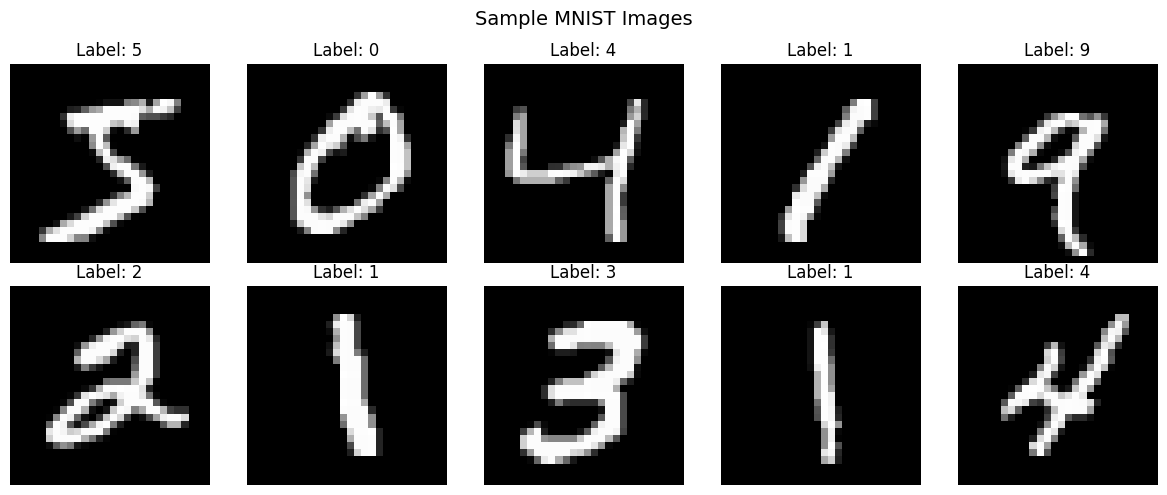

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].squeeze(), cmap="gray")
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")
plt.suptitle("Sample MNIST Images", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
model = keras.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Classifier
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")  # 10 classes (digits 0-9)
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 872,042 (3.33 MB)

 Trainable params: 871,338 (3.32 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, verbose=1),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)
]

history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8710 - loss: 0.4322 - val_accuracy: 0.3032 - val_loss: 2.0068 - learning_rate: 0.0010
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9763 - loss: 0.0740 - val_accuracy: 0.9898 - val_loss: 0.0381 - learning_rate: 0.0010
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9830 - loss: 0.0546 - val_accuracy: 0.9922 - val_loss: 0.0296 - learning_rate: 0.0010
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9861 - loss: 0.0440 - val_accuracy: 0.9917 - val_loss: 0.0281 - learning_rate: 0.0010
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9881 - loss: 0.0368 - val_accuracy: 0.9898 - val_loss: 0.0369 - learning_rate: 0.0010
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9889 - loss: 0.0326 - val_accuracy: 0.9927 - val_loss: 0.0254 - learning_rate: 0.0010
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9905 - loss: 0.030

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy : {test_acc * 100:.2f}%")
print(f"✅ Test Loss     : {test_loss:.4f}")



✅ Test Accuracy : 99.53%
✅ Test Loss     : 0.0152


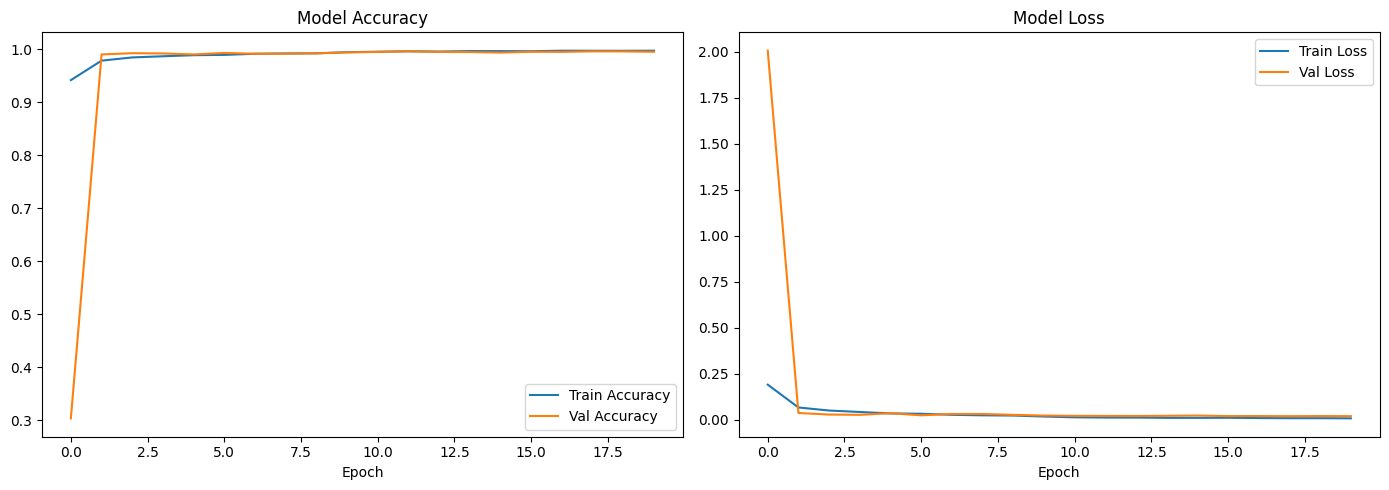

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history.history["accuracy"],     label="Train Accuracy")
ax1.plot(history.history["val_accuracy"], label="Val Accuracy")
ax1.set_title("Model Accuracy")
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(history.history["loss"],     label="Train Loss")
ax2.plot(history.history["val_loss"], label="Val Loss")
ax2.set_title("Model Loss")
ax2.set_xlabel("Epoch")
ax2.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


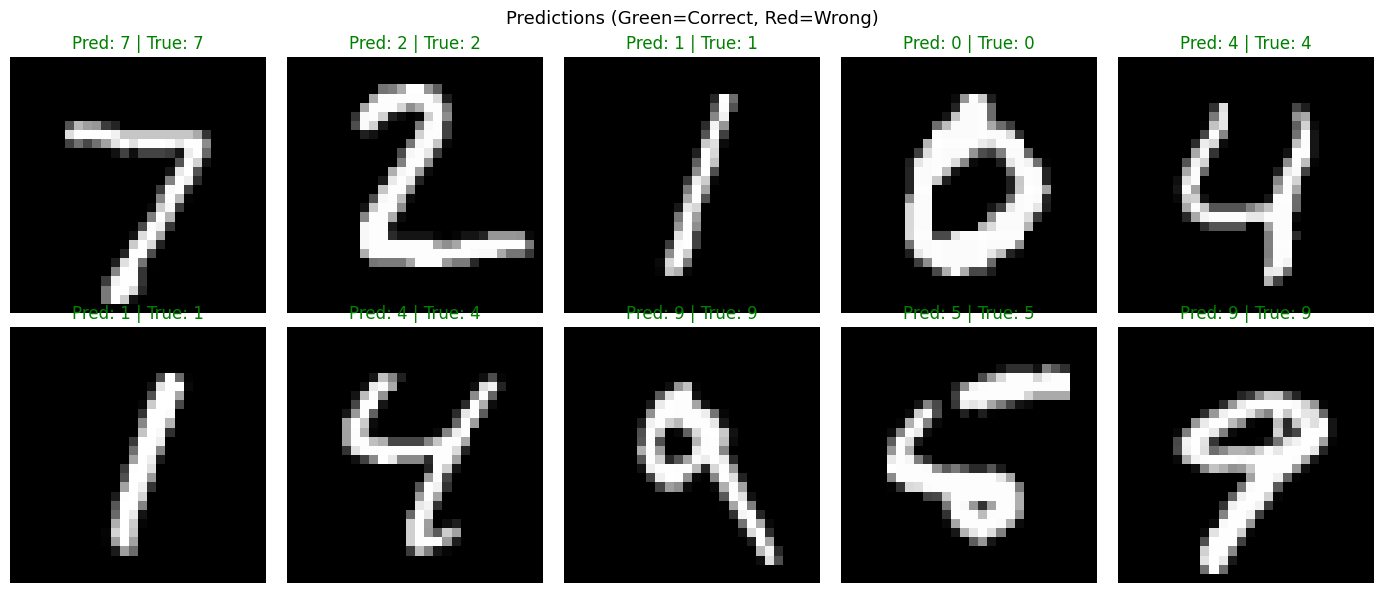

In [ ]:
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(2, 5, figsize=(14, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].squeeze(), cmap="gray")
    color = "green" if pred_labels[i] == y_test[i] else "red"
    ax.set_title(f"Pred: {pred_labels[i]} | True: {y_test[i]}", color=color)
    ax.axis("off")
plt.suptitle("Predictions (Green=Correct, Red=Wrong)", fontsize=13)
plt.tight_layout()
plt.show()


In [ ]:
model.save("mnist_cnn_model.h5")
print("Model saved as mnist_cnn_model.h5")

# To reload later:
# loaded_model = keras.models.load_model("mnist_cnn_model.h5")


Model saved as mnist_cnn_model.h5
